# Controls 1
Control system analysis assumes the system you are working with is linear (If you multiply the input by a scale factor, the output is multiplier by the same scale factor.) and time invariant. (Applying the input now gives the same output if you applied it later.) You will find that nothing is really linear, or time invariant.  What we do is narrow the scope of the input to the system so the system is close to linear, and we limit the time the system is guaranteed for, so it is is close to time invariant. Another way we ensure time invariance is to specify the power, temperature, humidity, radiation levels that system is exposed to.

## Automatic Control
The point of control systems to is automate the process of control. Cruise control controls the speed of the car.  An LM317 controls the voltage supplied to a system as the load current demand changes in time. Pace makers seek to control heart rate, and of course robots are made of multiple layers of control systems.

## What is a control system?
A control systems is composed of a summer, a system that needs to be controlled (mathematically represented by a transfer function.H(s)), components that measure the state of a system (velocity, temperature, voltage), a feedback control system (represented mathematically by another transfer function, G(s)) and a feedback loops that subtracts the output of the feedback system from he original input.  In many controls classes the physical part of the systems is stripped and everything is assumed to be a linear time invariant system with a signal flow diagram.  The complete system has a transfer function as well (Q(s)).

$$
Q(s)=\frac{H(s)}{1+G(s)\times  H(s)}
$$
Where $Q(s)$ is the transfer function of the complete system.  $H(s)$ is the transfer function of the system to be controlled, and $G(s)$ is the transfer function of the feedback control.  THe figure below is the block diagram of a simple control system.

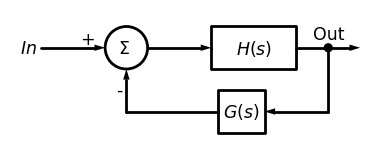

In [1]:
import schemdraw as schem
import schemdraw.elements as e
from schemdraw import dsp 
d = schem.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$G(s)$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw()

 

## Deriving the transfer function, Q(s) of the system.
Input and outputs are all functions of s.
$$Out=In\times H-Out\times G \times H$$
$$Out\left(1+ G\times H \right)=In\times H$$
$$Q(s)=\frac{Out}{In}=\frac{H}{1+GH}$$

The simplest for $G(s)$ can take is **Proportional**. $$G(s)=K$$, where K is a real number.  Another simple form for $G(s)$ is **Proportional plus Derivative (PD)**, where $G(s)=K\times s$  K is the scaler  constant and $s=\sigma+j\omega$. The last simple form is **Proportional plus Integral (PI)** where $G(s)=\frac{K}{s}$. PID controllers have all three elements, where $G(s)=K_1+K_2s+K_3\frac{1}{s}$.  The subscripted K values are all scale factors.

## Example
Find $Q(s)=\frac{H(s)}{1+G(s)\times H(s)}$ when $G(s)=K$, $sK$, and $\frac{K}{s}$ and $H(s)=\frac{10}{s}$

In [2]:
from sympy import symbols
from sympy import *
s= symbols("s", positive=True)
t,K= symbols("t,K", real=True)
H=10/s
G=K
Q=H/(1+G*H)
Q

10/(s*(10*K/s + 1))

In [3]:
Q.expand()

10/(10*K + s)

We can see that when when $G(s)=K$and  $H(s)=\frac{10}{s}$ we get a low pass filter.  The DC gain is 

In [4]:
Gain=limit(Q, s, 0) 
Gain

1/K

This is also a first order system with  a real pole.

In [5]:
num, de=fraction(Q)
Pole=solve(de, s)
Pole

[-10*K]

The breakpoints of the frequency response (Bode plot) would be:

In [6]:
w0=abs(Pole[0])
w0

10*Abs(K)

## Example
Find $Q(s)=\frac{H(s)}{1+G(s)\times H(s)}$ when  $G(s)=sK$ and $H(s)=\frac{10}{s}$

In [7]:
H=10/s
G=s*K
Q=H/(1+G*H)
Q

10/(s*(10*K + 1))

$Q(s)$ is now an integrator with  a scale factor of: 

In [8]:
Scale=limit(Q,s,1)
Scale

10/(10*K + 1)

## Example
Find $Q(s)=\frac{H(s)}{1+G(s)\times H(s)}$ when $G(s)=\frac{K}{s}$ and $H(s)=\frac{10}{s}$

In [9]:
H=10/s
G=K/s
Q=H/(1+G*H)
Q=Q.expand().normal()
Q

10*s/(10*K + s**2)

This is an oscillator given that the inverse Laplace transform is:

In [10]:
Q=Q.subs(K,1)
z=inverse_laplace_transform(Q,s,t).evalf().simplify()
z

10.0*cos(sqrt(10)*t)*Heaviside(t)

## Systems "in control" and "out of control".
Mathematically control is all about the poles.  If the real part of all the poles are on the left hand side of the complex plane (less than zero), then the system is in control.  The system can be in control even if the poles are complex, as long as the real part is less than zero.  A system is out of control if any pole has a real part that is equal to or greater than zero.

## What does being in control really mean?

A system is in control if you input a step function and the system's output eventually settles to a constant value.  (Sometimes an underdamped system can take "too long" to settle to a constant value and this situation informally known as being out of control.) 

## Example 1 system in control-First order low pass filter
$H(s)=\frac{10}{s+10}$

$h(t)=10\times e^{-10t}u(t)$

$f(t)=u(t)*h(t)=L^{-1}\left(\frac{1}{s}\times\frac{10}{s+10} \right)=\left(1-e^{-10t}\right)u(t)$

ExprDict({-10: 1})


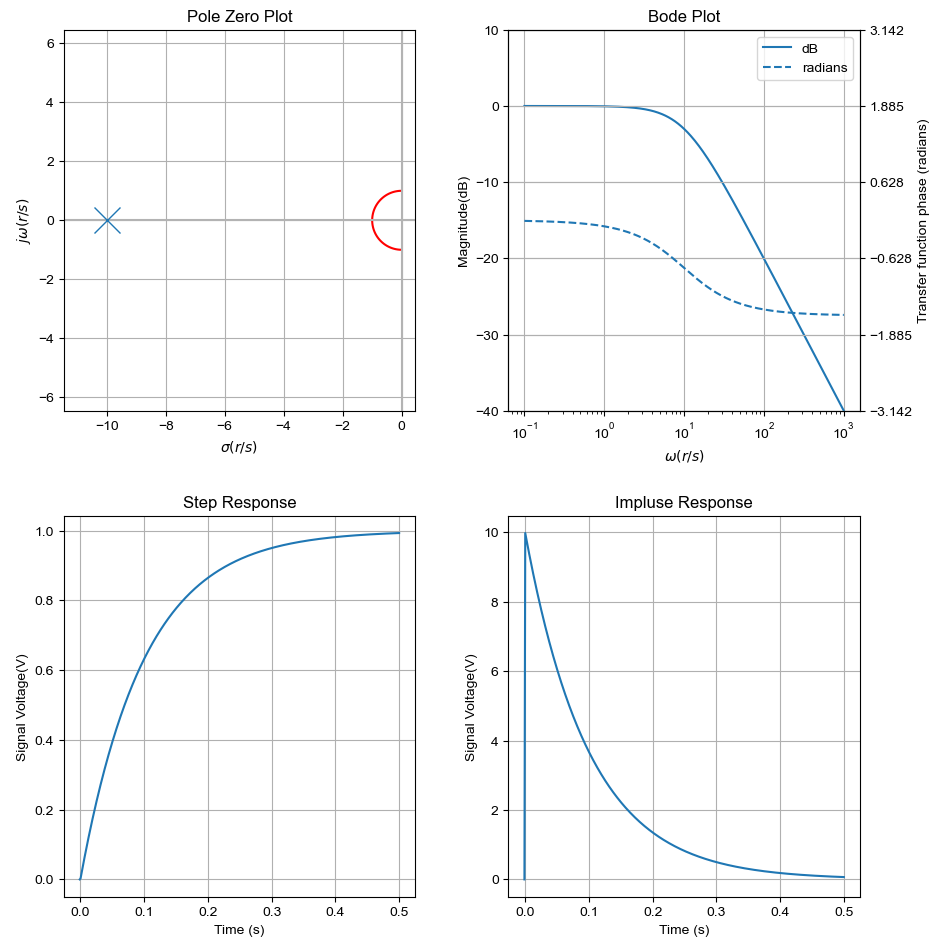

In [11]:
from lcapy import s, j, pi, f, transfer ,t, cos,sin
from matplotlib.pyplot import savefig
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from numpy import logspace
from numpy import linspace
import numpy as np
from matplotlib.pyplot import style
wo=10
H=transfer(wo/(s+wo)).simplify()
print(H.simplify().poles())
G=1/s 
F=H*G
ft=F(t, causal=True) 
#impluse
Hti=H(t, causal=True) 
# create half circle for pole zero
theta=linspace(np.pi/2.0,6*np.pi/4.0,num=50)
x=np.cos(theta)
y=np.sin(theta)

figs,((ax1,ax2),(ax3,ax4)) = subplots(2,2,figsize=(10,10))

ax1.plot(x,y,color='red')
ax1=H.plot(axes=ax1)
ax1.set_xlabel("$\sigma (r/s)$") 
ax1.set_ylabel("$j\omega (r/s)$")
ax1.set_title("Pole Zero Plot")
ax1.set_xlim([-12,1])

A = H.subs(j * f)
fv = logspace(-1, 3, 400)
tv = linspace(-.001, 500e-3, 400)
ax2=A.plot(fv, log_frequency=True,axes=ax2,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')
ax2[0].set_title("Bode Plot")
ax2[0].set_ylim([-40,10])
ax3=ft.plot(tv,axes=ax3,ylabel='Signal Voltage(V)')
ax3.set_title("Step Response")
 
ax4=Hti.plot(tv,axes=ax4,ylabel='Signal Voltage(V)')
ax4.set_title("Impluse Response")

figs.tight_layout(pad=2.5, w_pad=2.5, h_pad=2.5)
style.use('seaborn-v0_8') 
